In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [47]:
insert_data = pd.read_csv('/Users/Emily/Desktop/Lid_inserts/OWL_Output/CT_Summary_Partial_TL.csv', index_col=0)
insert_data.head()

,Well ID,WellNo,area,Total Worms,Chemotaxis,Original Compound,Plate condition,Compound,Strain,File Name,Well width,Plate ID,Passes QC
Record ID,,,,,,,,,,,,,
1,0,1A,2267862,206,0.549738,DMSO,no ins,DMSO_oIA_0,N2,CT01_Scan001,3033,CT01_P01,Y
2,1,1B,2280405,182,0.730061,IAA,no ins,IAA_i_0,N2,CT01_Scan001,3033,CT01_P01,Y
3,2,1C,2260545,239,-0.333333,OCT,no ins,OCT_i_0,N2,CT01_Scan001,3054,CT01_P01,Y
4,3,1D,2251974,337,-0.028939,DMSO,no ins,DMSO_oO_0,N2,CT01_Scan001,3040,CT01_P01,Y
5,4,2A,2273539,286,0.145098,DMSO,ins,DMSO_oIA_1,N2,CT01_Scan001,3051,CT01_P02,Y


In [48]:
comps = list(insert_data['Compound'].unique())
comps

['DMSO_oIA_0',
 'IAA_i_0',
 'OCT_i_0',
 'DMSO_oO_0',
 'DMSO_oIA_1',
 'IAA_i_1',
 'OCT_i_1',
 'DMSO_oO_1',
 'IAA_o_0',
 'DMSO_iIA_0',
 'DMSO_iO_0',
 'OCT_o_0',
 'IAA_o_1',
 'DMSO_iIA_1',
 'DMSO_iO_1',
 'OCT_o_1']

In [49]:
print(len(comps))
print(len(insert_data))

16
32


In [50]:
wrm_locs_fldr = plb.Path('/Users/Emily/Desktop/Lid_inserts/OWL_Output/')

In [51]:
def get_worm_locs(row, wrms, result_dict): 

    fname = row['File Name']
    wellnum = row['WellNo']
    compound = row['Compound']

    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')

    temp = pd.read_csv(loc_fname)
    xs = temp['X']
    #xs = list(temp['centroid-1'])
    if compound in result_dict:
        result_dict[compound] = result_dict[compound].append(xs)
        result_dict[compound].reset_index(inplace=True, drop=True)
        #result_dict[compound] = result_dict[compound]+xs
    else:
        result_dict[compound]=xs

    return result_dict


In [52]:
#conversion factors for dpi to mm
# 1 inch = 25.4mm
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm

In [57]:
results_dict = {}
#mean_df = pd.DataFrame(columns=['Condition', 'MeanPos'])
for index, row in insert_data.iterrows():
    pooled = get_worm_locs(row, wrm_locs_fldr, results_dict)

pooled_df = pd.DataFrame.from_dict(pooled)
mmdf = pooled_df.apply(lambda x: -(x/px_mm)+32.5)

,IAA_o_0,DMSO_iIA_0,DMSO_iO_0,OCT_o_0,IAA_o_1,DMSO_iIA_1,DMSO_iO_1,OCT_o_1
0,10.824568,10.856235,-0.171115,18.059776,2.851150,-1.429775,-24.740252,-21.434431
1,4.337388,1.711376,-6.999619,17.204438,11.615612,-23.712531,-8.395637,-17.734725
2,-8.800025,-0.343969,12.467688,-16.590558,11.259838,-12.865642,-21.656543,-13.427914
3,14.033883,-8.470936,-3.501533,10.413383,5.949811,-6.805115,-12.474224,-2.376108
4,5.812027,-19.231956,8.274028,-8.378478,18.870990,-17.788877,14.310778,-17.599597


In [63]:
iaa = ['IAA_o_1', 'IAA_o_0',  'IAA_i_1',  'IAA_i_0'] 

oc = ['OCT_i_1', 'OCT_i_0', 'OCT_o_1', 'OCT_o_0', ]

In [64]:

iDMSO_obj = db.load(mmdf, idx=(oc))
results_df = iDMSO_obj.mean_diff.results

In [65]:
print(len(insert_data))
print(len(comps))

32
16


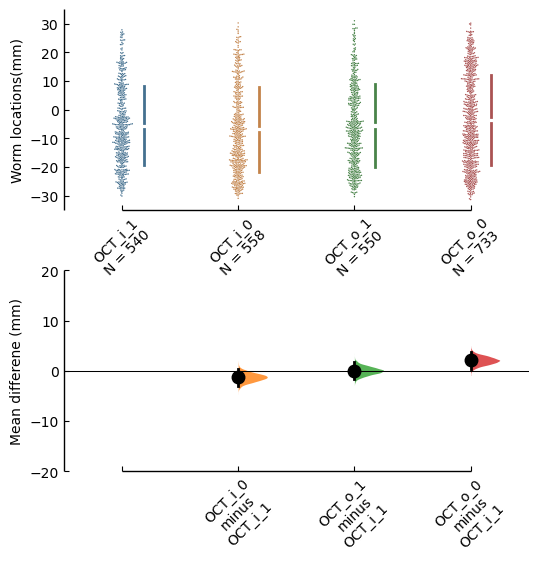

In [66]:
mm_plot = iDMSO_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm locations(mm)', 
                                        contrast_label="Mean differene (mm)", contrast_ylim = (-20,20), swarm_ylim=(-35,35))

#Accessing plot axes to control plot asthetics
rawswarm_axes = mm_plot.axes[0]
contrast_axes = mm_plot.axes[1]

rawswarm_axes.yaxis.set_tick_params(tickdir='in')
rawswarm_axes.xaxis.set_tick_params(tickdir='in', rotation=45)

contrast_axes.yaxis.set_tick_params(tickdir='in')
contrast_axes.xaxis.set_tick_params(tickdir='in',rotation=45)
plt.rcParams['svg.fonttype'] = 'none'
plt.show()